In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [121]:
e_c = pd.read_csv('../datasets/energy_consumption.csv')

In [122]:
e_c.columns = e_c.columns.str.strip().str.lower().str.replace(' ','_')
e_c = e_c.rename(columns={'zone_1_power_consumption': 'zone_1_pwc',
                          'zone_2__power_consumption': 'zone_2_pwc',
                          'zone_3__power_consumption': 'zone_3_pwc'})

e_c['datetime'] = pd.to_datetime(e_c['datetime'])
e_c.set_index('datetime', inplace=True)
e_c

,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pwc,zone_2_pwc,zone_3_pwc
datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [123]:
e_c.describe()

,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pwc,zone_2_pwc,zone_3_pwc
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [124]:
e_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temperature            52416 non-null  float64
 1   humidity               52416 non-null  float64
 2   wind_speed             52416 non-null  float64
 3   general_diffuse_flows  52416 non-null  float64
 4   diffuse_flows          52416 non-null  float64
 5   zone_1_pwc             52416 non-null  float64
 6   zone_2_pwc             52416 non-null  float64
 7   zone_3_pwc             52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


In [125]:
# Se reduce la frecuencia a un promedio diario
daily_avg_pwc = e_c.resample('D').mean()[['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc']]
daily_avg_pwc


,zone_1_pwc,zone_2_pwc,zone_3_pwc
datetime,,,
2017-01-01,28465.232067,17737.791287,17868.795181
2017-01-02,28869.493671,19557.725431,17820.763053
2017-01-03,30562.447257,20057.269504,17620.803213
2017-01-04,30689.831224,20102.077001,17673.694779
2017-01-05,30802.911393,20033.941237,17664.176707
...,...,...,...
2017-12-26,30013.476975,24757.006239,11395.678272
2017-12-27,29966.962399,25057.481845,11498.279312
2017-12-28,30267.004647,24585.251099,11167.026811


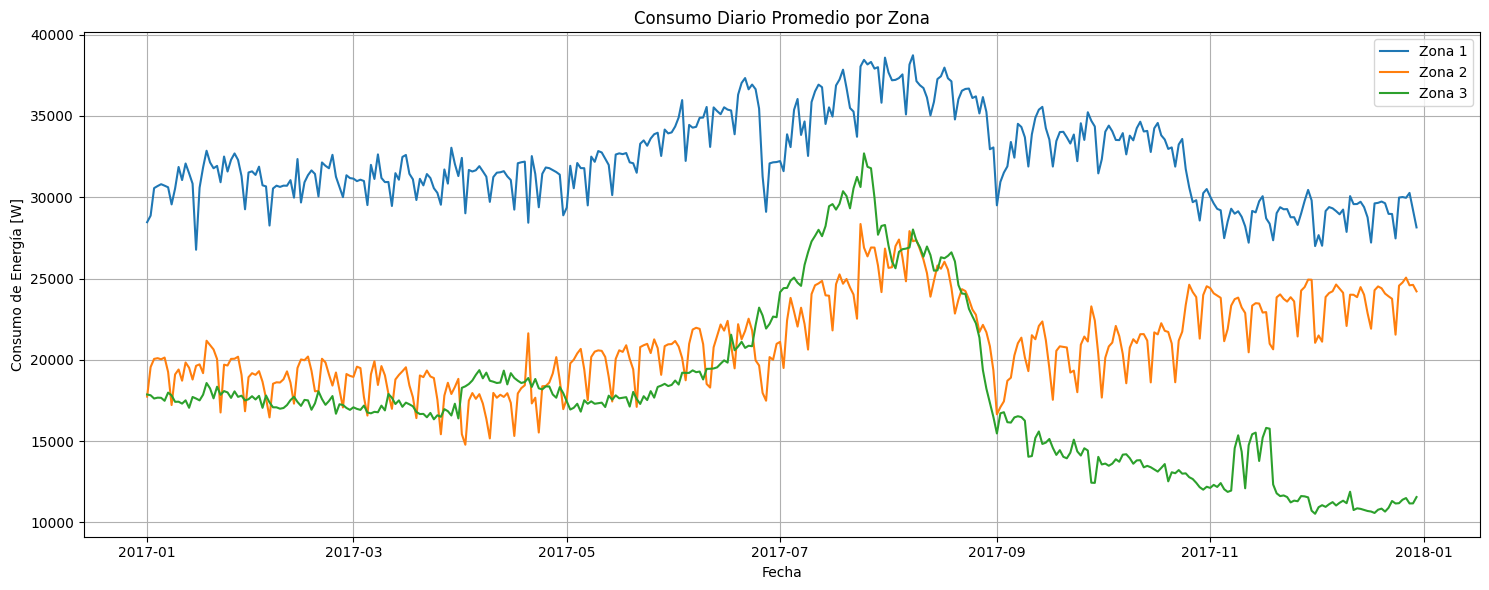

In [126]:
# Se grafica el consumo diario promedio por zona

plt.figure(figsize=(15, 6))
plt.plot(daily_avg_pwc['zone_1_pwc'], label='Zona 1')
plt.plot(daily_avg_pwc['zone_2_pwc'], label='Zona 2')
plt.plot(daily_avg_pwc['zone_3_pwc'], label='Zona 3')

# Se configura la gráfica
plt.title('Consumo Diario Promedio por Zona')
plt.xlabel('Fecha')
plt.ylabel('Consumo de Energía [W]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
# Se calcula el promedio mensual de consumo por zona
monthly_avg_pwc = e_c.resample('M').mean()[['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc']]
monthly_avg_pwc 

C:\Users\gabri\AppData\Local\Temp\ipykernel_12316\3292849334.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_pwc = e_c.resample('M').mean()[['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc']]


,zone_1_pwc,zone_2_pwc,zone_3_pwc
datetime,,,
2017-01-31,31032.493535,19394.444717,17746.095349
2017-02-28,30985.753632,18787.793096,17335.002154
2017-03-31,31155.165408,18457.937484,16947.686004
2017-04-30,31169.768210,17633.966395,18593.167677
2017-05-31,32396.009166,19977.287859,17621.100953
2017-06-30,34605.540839,20670.928621,20430.941538
2017-07-31,35831.553603,24147.886893,28194.111216
2017-08-31,36435.189574,24656.216575,24648.894732
2017-09-30,33396.681416,20180.432259,14922.798774


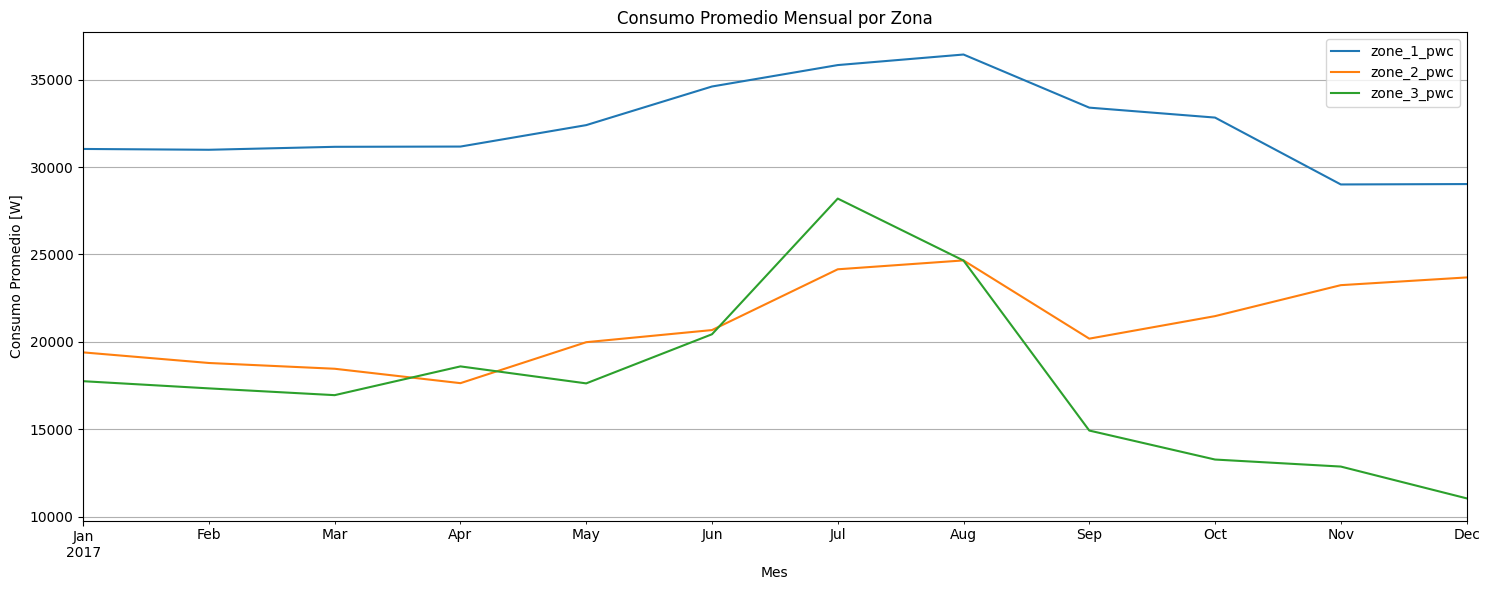

In [128]:
# Se grafica el consumo mensual
monthly_avg_pwc.plot(figsize=(15, 6))
plt.title('Consumo Promedio Mensual por Zona')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio [W]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

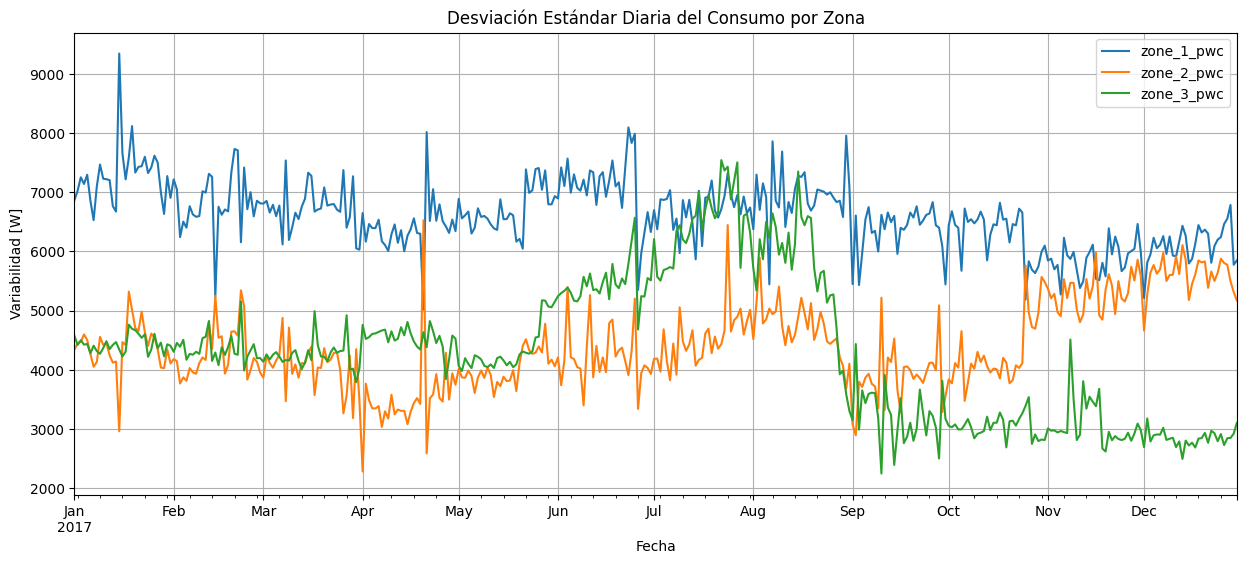

In [129]:
# Se calcula la desviación estándar diaria del consumo por zona
daily_std_pwc = e_c.resample('D').std()[['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc']]
daily_std_pwc.plot(figsize=(15,6), title='Desviación Estándar Diaria del Consumo por Zona')
plt.xlabel('Fecha')
plt.ylabel('Variabilidad [W]')
plt.grid(True)
plt.show()

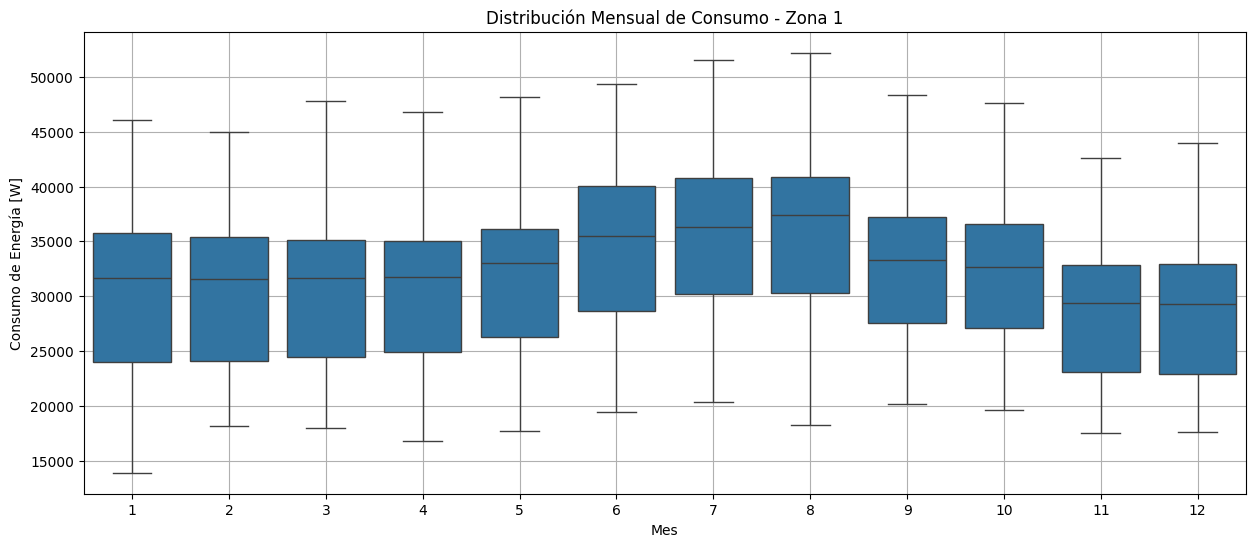

In [130]:
# Se crea una nueva columna con el nombre del mes
e_c['month'] = e_c.index.month

# Boxplot de consumo por zona y mes
plt.figure(figsize=(15, 6))
sns.boxplot(data=e_c, x='month', y='zone_1_pwc')
plt.title('Distribución Mensual de Consumo - Zona 1')
plt.xlabel('Mes')
plt.ylabel('Consumo de Energía [W]')
plt.grid(True)
plt.show()

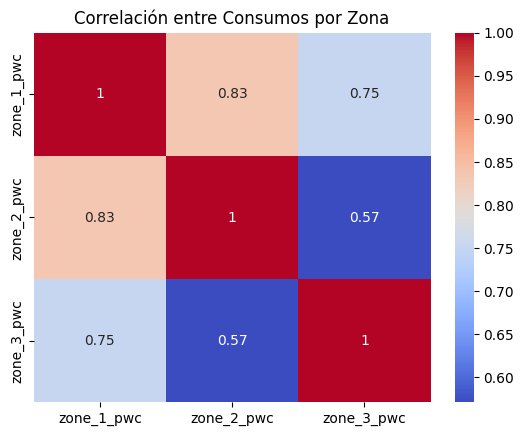

In [131]:
# Se calcula la matriz de correlación entre zonas
corr = e_c[['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc']].corr()

# Se grafica con seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre Consumos por Zona')
plt.show()

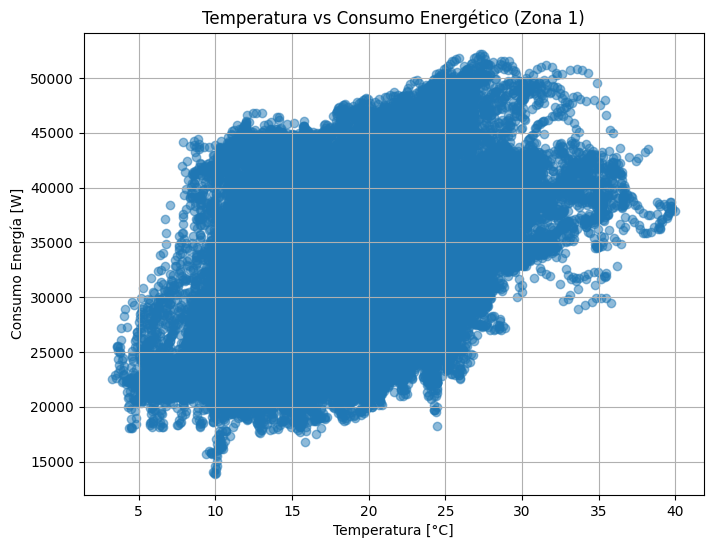

In [132]:
# Gráfica de dispersión entre temperatura y consumo en zona 1
plt.figure(figsize=(8,6))
plt.scatter(e_c['temperature'], e_c['zone_1_pwc'], alpha=0.5)
plt.title('Temperatura vs Consumo Energético (Zona 1)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Consumo Energía [W]')
plt.grid(True)
plt.show()

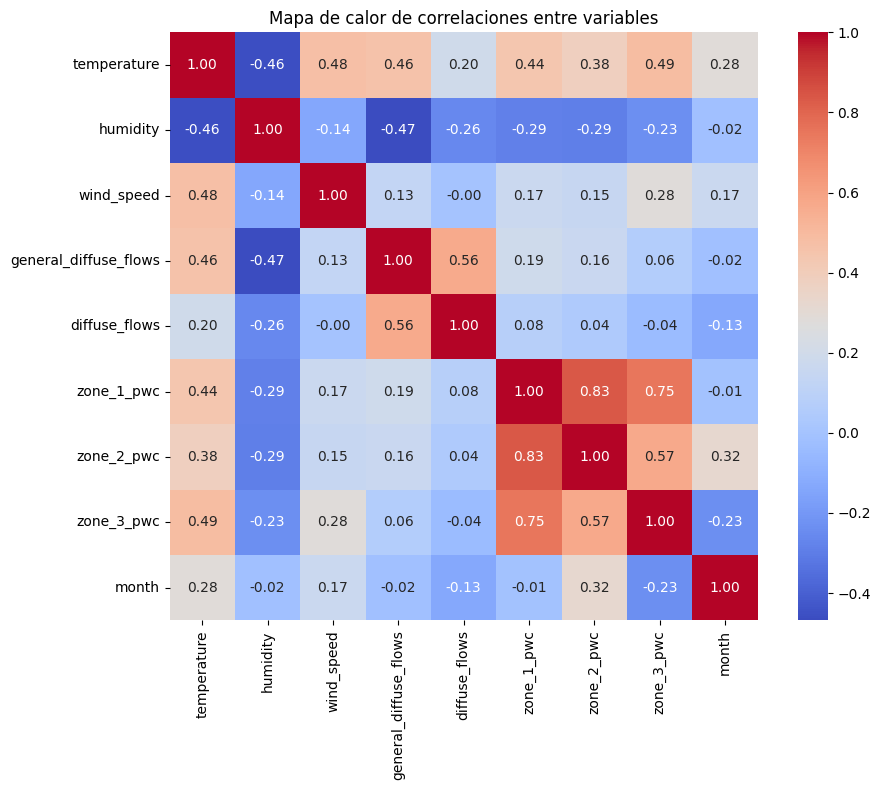

In [133]:
# Se crea una figura para graficar el mapa de calor
plt.figure(figsize=(10, 8))

# Se calcula y grafica la matriz de correlación entre variables
sns.heatmap(e_c.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Se establece el título de la figura
plt.title("Mapa de calor de correlaciones entre variables")

# Se ajusta el diseño final
plt.tight_layout()

# Se muestra la figura
plt.show()

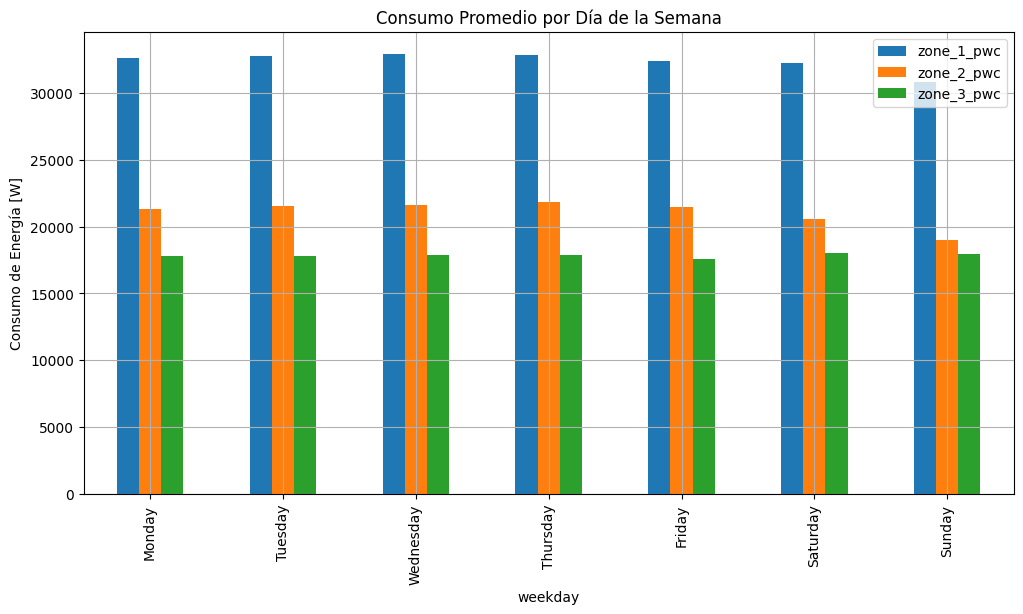

In [134]:
# Se agrega columna con día de la semana
e_c['weekday'] = e_c.index.day_name()

# Consumo promedio por día de la semana
avg_by_day = e_c.groupby('weekday')[['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc']].mean()

# Se ordenan los días
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day = avg_by_day.reindex(ordered_days)

# Se grafica
avg_by_day.plot(kind='bar', figsize=(12,6), title='Consumo Promedio por Día de la Semana')
plt.ylabel('Consumo de Energía [W]')
plt.grid(True)
plt.show()

In [135]:
e_c

,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pwc,zone_2_pwc,zone_3_pwc,month,weekday
datetime,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,Sunday
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,Sunday
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,Sunday
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,Sunday
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,Sunday
...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,12,Saturday
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,12,Saturday
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,12,Saturday


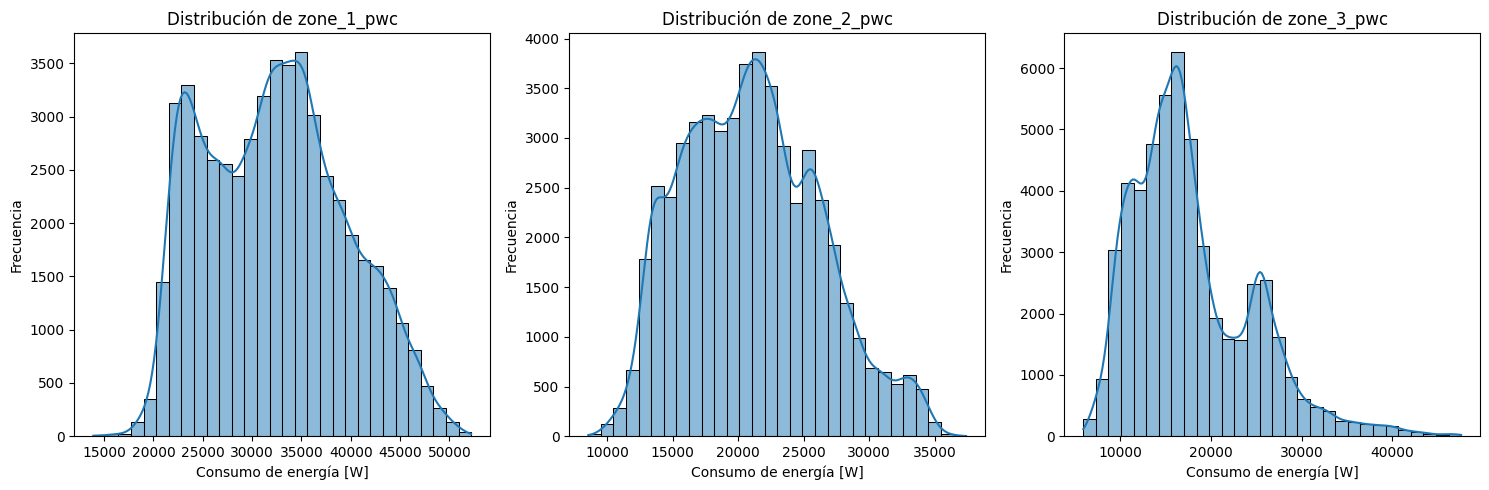

In [136]:
# Se crea una figura con tres subgráficas horizontales
plt.figure(figsize=(15, 5))

# Se itera sobre cada columna de consumo por zona
for i, col in enumerate(['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc'], 1):
  # Se crea una subgráfica para cada zona
  plt.subplot(1, 3, i)

  # Se grafica el histograma con curva KDE
  sns.histplot(e_c[col], kde=True, bins=30)

  # Se asignan títulos y etiquetas
  plt.title(f'Distribución de {col}')
  plt.xlabel('Consumo de energía [W]')
  plt.ylabel('Frecuencia')

# Se ajusta el diseño final
plt.tight_layout()

# Se muestra la figura
plt.show()

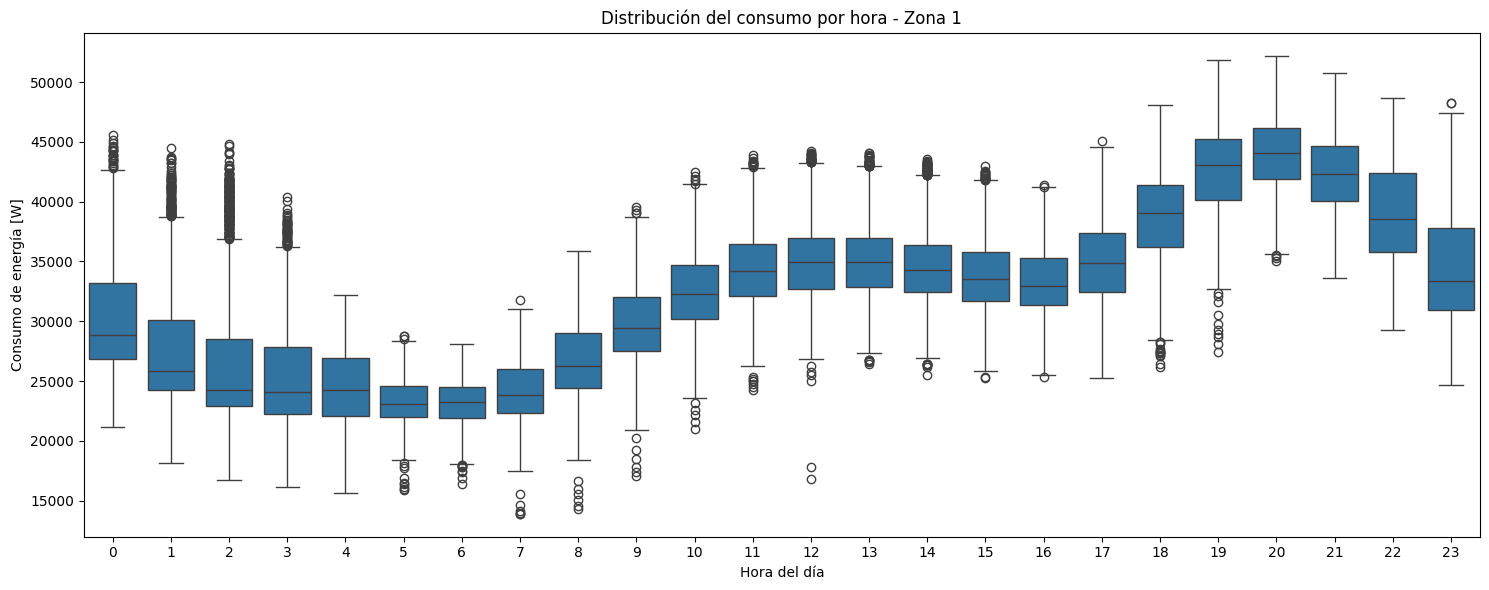

In [137]:
# Se crea una nueva columna con la hora extraída del índice datetime
e_c['hour'] = e_c.index.hour

# Se define el tamaño de la figura
plt.figure(figsize=(15, 6))

# Se grafica un boxplot del consumo por hora del día para la zona 1
sns.boxplot(data=e_c, x='hour', y='zone_1_pwc')

# Se asignan títulos y etiquetas
plt.title('Distribución del consumo por hora - Zona 1')
plt.xlabel('Hora del día')
plt.ylabel('Consumo de energía [W]')

# Se ajusta el diseño final
plt.tight_layout()

# Se muestra la figura
plt.show()

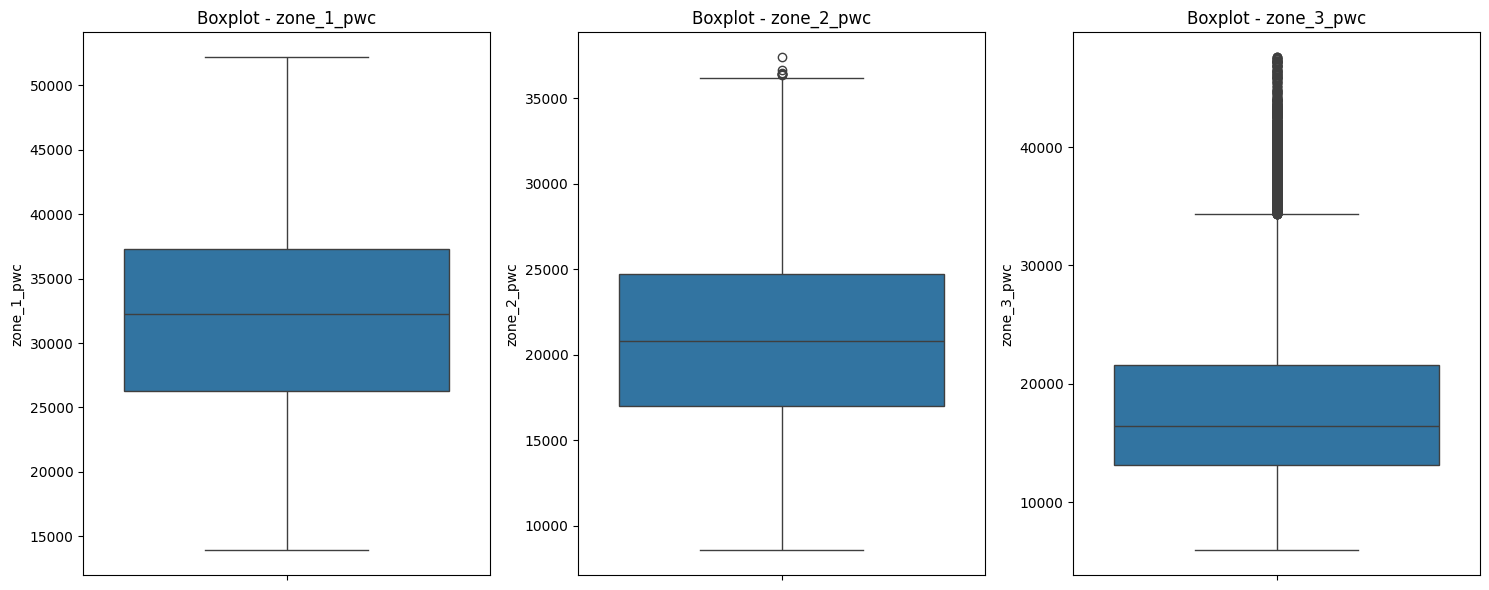

In [138]:
# Se crea una figura con tres subgráficas para representar los outliers por zona
plt.figure(figsize=(15, 6))

# Se itera sobre cada zona para graficar un boxplot
for i, col in enumerate(['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc'], 1):
  # Se define la subgráfica
  plt.subplot(1, 3, i)
  
  # Se grafica el boxplot
  sns.boxplot(y=e_c[col])

  # Se asigna el título de la subgráfica
  plt.title(f'Boxplot - {col}')

# Se ajusta el diseño general de la figura
plt.tight_layout()

# Se muestra la figura
plt.show()

In [139]:
# Se define una función para detectar valores atípicos con el método IQR
def detectar_outliers_iqr(serie):
  # Se calculan los percentiles Q1 y Q3
  Q1 = serie.quantile(0.25)
  Q3 = serie.quantile(0.75)

  # Se calcula el rango intercuartílico
  IQR = Q3 - Q1

  # Se calculan los límites inferior y superior
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Se retorna una serie booleana con True donde hay outliers
  return (serie < limite_inferior) | (serie > limite_superior)

# Se aplica la función a cada zona y se almacena la cantidad de outliers
for col in ['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc']:
  outliers = detectar_outliers_iqr(e_c[col])
  cantidad = outliers.sum()
  porcentaje = (cantidad / len(e_c)) * 100

  # Se imprime el resultado por zona
  print(f'{col}: {cantidad} valores atípicos ({porcentaje:.2f}%)')

zone_1_pwc: 0 valores atípicos (0.00%)
zone_2_pwc: 7 valores atípicos (0.01%)
zone_3_pwc: 1191 valores atípicos (2.27%)


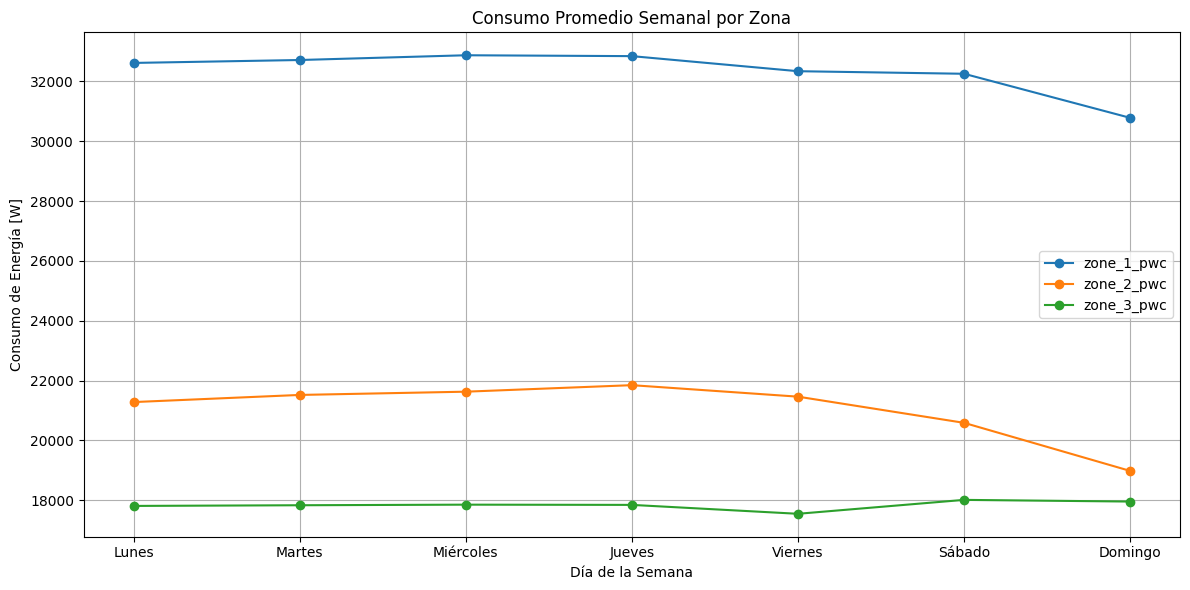

In [140]:
# Se agrega una nueva columna con el día de la semana extraído del índice datetime
# 0 = Lunes, 6 = Domingo
e_c['day_of_week'] = e_c.index.dayofweek

# Se crea un diccionario para traducir los números a nombres de días
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves',
               4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}

# Se mapea la columna numérica a nombres de días para mayor claridad en las gráficas
e_c['nombre_dia'] = e_c['day_of_week'].map(dias_semana)

# Se agrupa el dataframe por día de la semana y se calcula el promedio
consumo_semanal = e_c.groupby('nombre_dia')[['zone_1_pwc', 'zone_2_pwc', 'zone_3_pwc']].mean()

# Se reordenan los días para que sigan el orden natural de la semana
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
consumo_semanal = consumo_semanal.loc[orden_dias]

# Se grafican los promedios semanales por zona
plt.figure(figsize=(12, 6))
for zona in consumo_semanal.columns:
  # Se grafica una línea por cada zona
  plt.plot(consumo_semanal.index, consumo_semanal[zona], marker='o', label=zona)

# Se configura la gráfica
plt.title('Consumo Promedio Semanal por Zona')
plt.xlabel('Día de la Semana')
plt.ylabel('Consumo de Energía [W]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

MAE: 2795.32


Text(0.5, 1.0, 'Consumo ZONA 1 - Predicción vs Real')

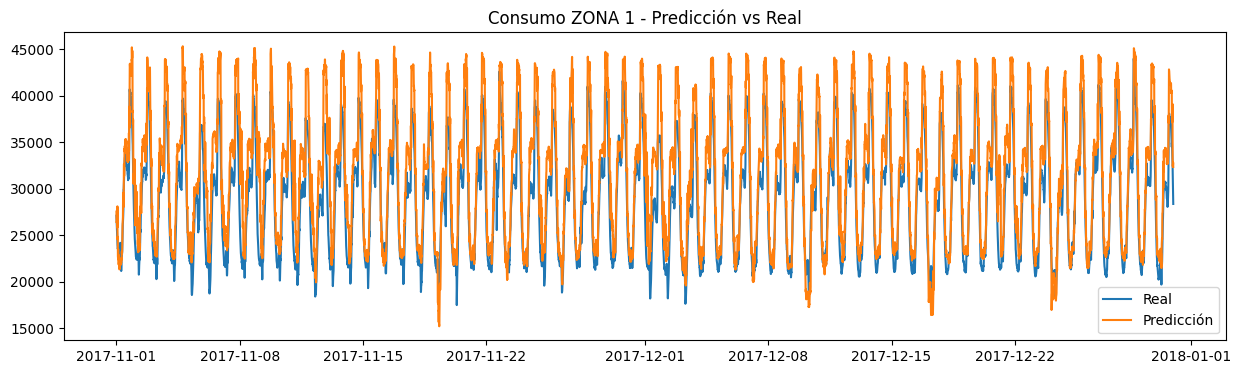

In [143]:
# Se crean variables temporales relevantes
e_c['hour'] = e_c.index.hour
e_c['dayofweek'] = e_c.index.dayofweek
e_c['month'] = e_c.index.month


# Se define un punto de corte temporal
split_date = '2017-11-01 00:00:00'
train = e_c.loc[:split_date]
test = e_c.loc[split_date:]


# Se definen las features y target
features = ['temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows', 'hour', 'dayofweek']
X_train = train[features]
y_train = train['zone_1_pwc']
X_test = test[features]
y_test = test['zone_1_pwc']


# Se entrena el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Se predice y se evalúa
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")


# Se grafican predicciones vs valores reales
plt.figure(figsize=(15,4))
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, y_pred, label='Predicción')
plt.legend()
plt.title('Consumo ZONA 1 - Predicción vs Real')